In [1]:
import pandas as pd
import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel(file, 'Transactions', header=1)
df2 = pd.read_excel(file, 'NewCustomerList', header=1)
df3 = pd.read_excel(file, 'CustomerDemographic', header=1)
df4 = pd.read_excel(file, 'CustomerAddress', header=1)

mfpg = pd.ExcelFile('Multifactor Productivity Growth.xlsx')
mfpg1 = pd.read_excel(mfpg, 'Sheet1', header=1)
mfpg2 = pd.read_excel(mfpg, 'Sheet2', header=2)

In [3]:
df3.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [4]:
df3['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [5]:
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

In [6]:
df3 = df3[df3['deceased_indicator'] != 'Y']
df3 = df3.dropna(axis=0, subset = ['DOB'])
df3 = df3.drop(['default'], axis=1)

df3['age'] = [calculateAge(i) for i in df3['DOB']]
df3 = df3[df3['age'] < 110]
df3['gender'] = ['Male' if i == 'M' else 'Female' if i == 'F' else 'Female' if i == 'Femal' else i for i in df3['gender']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            3910 non-null int64
first_name                             3910 non-null object
last_name                              3789 non-null object
gender                                 3910 non-null object
past_3_years_bike_related_purchases    3910 non-null int64
DOB                                    3910 non-null datetime64[ns]
job_title                              3413 non-null object
job_industry_category                  3254 non-null object
wealth_segment                         3910 non-null object
deceased_indicator                     3910 non-null object
owns_car                               3910 non-null object
tenure                                 3910 non-null float64
age                                    3910 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 427.7+ KB


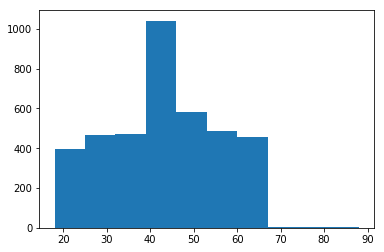

In [7]:
plt.hist(np.array(df3['age']))
plt.show();

In [8]:
bins = [0, 25, 35, 45, 55, 110]
bins_age = pd.cut(df3['age'], bins, right=False)
df3['agebin'] = bins_age

In [9]:
paying_cust = set(df1['customer_id'])
df3 = df3[df3['customer_id'].isin(paying_cust)]

In [10]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [11]:
df1 = df1[~df1['product_first_sold_date'].isna()]
df1['product_first_sold_date'] = [datetime.timedelta(days=i) if i != np.NaN else i for i in df1['product_first_sold_date']]

In [12]:
df1['season'] = [(i.month%12 + 3)//3 for i in df1.transaction_date]
df1['season'] = ['Winter' if i == 1 else 'Spring' if i == 2 else 'Summer' if i == 3 else 'Fall' for i in df1['season']]

In [13]:
df1['Sale_revenue'] = df1['list_price'] - df1['standard_cost']
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,season,Sale_revenue
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245 days,Winter,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701 days,Spring,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361 days,Fall,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145 days,Summer,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226 days,Fall,1055.82


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [15]:
df4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
df4['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [17]:
df4['state'] = ['NSW' if i == 'New South Wales' else 'VIC' if i == 'Victoria' else i for i in df4['state']]

In [18]:
with pd.ExcelWriter('Cleaned.xlsx') as writer:
    df3.to_excel(writer, sheet_name='CustDemo')
    df1.to_excel(writer, sheet_name='Transactions')
    df2.to_excel(writer, sheet_name='NewCust')
    df4.to_excel(writer, sheet_name='CustAddresses')